In [ ]:
from dotenv import load_dotenv
load_dotenv()

import streamlit as st
import os
import google.generativeai as genai

genai.configure(api_key=os.getenv(""))

## function to load Gemini Pro model and get repsonses
model=genai.GenerativeModel("gemini-pro")
chat = model.start_chat(history=[])
def get_gemini_response(question):

    response=chat.send_message(question,stream=True)
    return response

##initialize our streamlit app

st.set_page_config(page_title="Q&A Demo")

st.header("Gemini LLM Application")

# Initialize session state for chat history if it doesn't exist
if 'chat_history' not in st.session_state:
    st.session_state['chat_history'] = []

input=st.text_input("Input: ",key="input")
submit=st.button("Ask the question")

if submit and input:
    response=get_gemini_response(input)
    # Add user query and response to session state chat history
    st.session_state['chat_history'].append(("You", input))
    st.subheader("The Response is")
    for chunk in response:
        st.write(chunk.text)
        st.session_state['chat_history'].append(("Bot", chunk.text))
st.subheader("The Chat History is")

for role, text in st.session_state['chat_history']:
    st.write(f"{role}: {text}")





2024-06-21 03:29:06.144 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-06-21 03:29:06.162 Session state does not function when running a script without `streamlit run`


In [ ]:
!pip install streamlit google-generativeai pyngrok


In [ ]:
%%writefile app.py
import streamlit as st
import os
from dotenv import load_dotenv
import google.generativeai as genai

load_dotenv()

genai.configure(api_key=os.getenv(""))

## function to load Gemini Pro model and get repsonses
model = genai.GenerativeModel("gemini-pro")
chat = model.start_chat(history=[])
def get_gemini_response(question):
    response = chat.send_message(question, stream=True)
    return response

##initialize our streamlit app
st.set_page_config(page_title="Q&A Demo")

st.header("Gemini LLM Application")

# Initialize session state for chat history if it doesn't exist
if 'chat_history' not in st.session_state:
    st.session_state['chat_history'] = []

input = st.text_input("Input: ", key="input")
submit = st.button("Ask the question")

if submit and input:
    response = get_gemini_response(input)
    # Add user query and response to session state chat history
    st.session_state['chat_history'].append(("You", input))
    st.subheader("The Response is")
    for chunk in response:
        st.write(chunk.text)
        st.session_state['chat_history'].append(("Bot", chunk.text))

st.subheader("The Chat History is")
for role, text in st.session_state['chat_history']:
    st.write(f"{role}: {text}")


Writing app.py


In [ ]:
import os
from dotenv import load_dotenv
import gradio as gr
import google.generativeai as genai

load_dotenv()

genai.configure(api_key=os.getenv(""))

## function to load Gemini Pro model and get responses
model = genai.GenerativeModel("gemini-pro")
chat = model.start_chat(history=[])

def get_gemini_response(question):
    response = chat.send_message(question, stream=True)
    full_response = "".join([chunk.text for chunk in response])
    return full_response

# Gradio interface
def gradio_interface(input_text):
    response = get_gemini_response(input_text)
    return response

# Create a Gradio interface
interface = gr.Interface(fn=gradio_interface,
                         inputs=gr.inputs.Textbox(lines=2, placeholder="Enter your question here..."),
                         outputs="text",
                         title="Gemini LLM Application",
                         description="Ask questions and get responses from the Gemini LLM.")

# Launch the Gradio interface
interface.launch()



AttributeError: module 'gradio' has no attribute 'inputs'

In [ ]:
!pip install google-generativeai translate


In [ ]:
import os
import google.generativeai as genai
import re
from translate import Translator

# Set the Gemini API key (replace with your actual key)
os.environ["GOOGLE_API_KEY"] = "YOUR_GEMINI_API_KEY"
genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

def extract_locations(user_input_text):
    # Regular expressions to extract locations from input
    patterns = [
        re.compile(r"take me from\s+(.+?)\s+to\s+(.+)", re.IGNORECASE),
        re.compile(r"from\s+(.+?)\s+to\s+(.+)", re.IGNORECASE),
        re.compile(r"i want to go from\s+(.+?)\s+to\s+(.+)", re.IGNORECASE)
    ]

    for pattern in patterns:
        match = pattern.search(user_input_text)
        if match:
            start_location = match.group(1).strip()
            end_location = match.group(2).strip()
            return start_location, end_location
    return None, None

def generate_route_description(start_location, end_location):
    # Prompt for the Gemini API
    prompt = f"Provide a detailed driving route from {start_location} to {end_location}. Include major turns, landmarks, and distances."

    response = genai.generate_text(
        prompt,
        model="gemini-pro",
        max_output_tokens=500
    )

    return response.text.strip()

def translate_description(route_description, target_language):
    if target_language == 'en':
        return route_description  # No translation needed if English is selected

    # Initialize translator
    translator = Translator(to_lang=target_language)

    # Split route description into manageable chunks (e.g., sentences)
    sentences = route_description.split('. ')
    translated_sentences = []

    # Translate each sentence and join them back together
    for sentence in sentences:
        translated_sentence = translator.translate(sentence)
        translated_sentences.append(translated_sentence)

    translated_description = '. '.join(translated_sentences)

    return translated_description

# Run the chatbot in a loop
print("Greetings! I am SARATHI, developed by NIT Calicut students. Type 'exit' to quit.")
while True:
    # Use a different variable name to avoid overwriting the input() function
    user_input_text = input("Enter your request: ")
    if user_input_text.lower() == 'exit':
        print('Exiting')
        break

    start_location, end_location = extract_locations(user_input_text)
    if not start_location or not end_location:
        print("Invalid input format. Please use phrases like 'take me from [start location] to [end location]', 'from [start location] to [end location]', or 'I want to go from [start location] to [end location]'.")
        continue

    route_description = generate_route_description(start_location, end_location)
    print("Route Description (in English):", route_description)

    # Ask user for desired language for route description
    target_language = input("Enter language code for translation (e.g., 'hi' for Hindi): ").lower()

    translated_description = translate_description(route_description, target_language)
    print(f"Route Description (in {target_language}):", translated_description)


Greetings! I am SARATHI, developed by NIT Calicut students. Type 'exit' to quit.


TypeError: 'str' object is not callable

In [ ]:
import os
import google.generativeai as genai
from translate import Translator

# Set the Gemini API key (replace with your actual key)
os.environ["GOOGLE_API_KEY"] = ""
genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))


In [ ]:
def generate_route_description(start_location, end_location):
    # Prompt for the Gemini API
    prompt = f"Provide a detailed driving route from {start_location} to {end_location}. Include major turns, landmarks, and distances."

    response = genai.generate_text(
        prompt,
        model="gemini-pro",
        max_output_tokens=500
    )

    return response.text.strip()

def translate_description(route_description, target_language):
    if target_language == 'en':
        return route_description  # No translation needed if English is selected

    # Initialize translator
    translator = Translator(to_lang=target_language)

    # Split route description into manageable chunks (e.g., sentences)
    sentences = route_description.split('. ')
    translated_sentences = [translator.translate(sentence) for sentence in sentences]

    translated_description = '. '.join(translated_sentences)

    return translated_description


In [ ]:
import re

def extract_locations(user_input_text):
    # Regular expressions to extract locations from input
    patterns = [
        re.compile(r"take me from\s+(.+?)\s+to\s+(.+)", re.IGNORECASE),
        re.compile(r"from\s+(.+?)\s+to\s+(.+)", re.IGNORECASE),
        re.compile(r"i want to go from\s+(.+?)\s+to\s+(.+)", re.IGNORECASE)
    ]

    for pattern in patterns:
        match = pattern.search(user_input_text)
        if match:
            start_location = match.group(1).strip()
            end_location = match.group(2).strip()
            return start_location, end_location
    return None, None

# Run the chatbot in a loop
print("Greetings! I am SARATHI, developed by NIT Calicut students. Type 'exit' to quit.")
while True:
    user_input_text = input("Enter your request: ")
    if user_input_text.lower() == 'exit':
        print('Exiting')
        break

    start_location, end_location = extract_locations(user_input_text)
    if not start_location or not end_location:
        print("Invalid input format. Please use phrases like 'take me from [start location] to [end location]', 'from [start location] to [end location]', or 'I want to go from [start location] to [end location]'.")
        continue

    route_description = generate_route_description(start_location, end_location)
    print("Route Description (in English):", route_description)

    # Ask user for desired language for route description
    target_language = input("Enter language code for translation (e.g., 'hi' for Hindi): ").lower()

    translated_description = translate_description(route_description, target_language)
    print(f"Route Description (in {target_language}):", translated_description)


Greetings! I am SARATHI, developed by NIT Calicut students. Type 'exit' to quit.


TypeError: 'str' object is not callable

In [ ]:
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.1/163.1 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.3/717.3 kB 19.7 MB/s eta 0:00:00


In [ ]:
import google.generativeai as genai
GOOGLE_API_KEY = ""
genai.configure(api_key=GOOGLE_API_KEY)


In [ ]:
!pip install openai google-generativeai translate pydub SpeechRecognition


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.4/327.4 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 20.8 MB/s eta 0:00:00


In [ ]:
import os
import openai
import re
from translate import Translator
from pydub import AudioSegment
import speech_recognition as sr

# Set the OpenAI API key (replace with your actual key)
os.environ["OPENAI_API_KEY"] = ""
openai.api_key = os.getenv("OPENAI_API_KEY")

def extract_locations(user_input):
    # Regular expressions to extract locations from input
    patterns = [
        re.compile(r"take me from\s+(.+?)\s+to\s+(.+)", re.IGNORECASE),
        re.compile(r"from\s+(.+?)\s+to\s+(.+)", re.IGNORECASE),
        re.compile(r"i want to go from\s+(.+?)\s+to\s+(.+)", re.IGNORECASE)
    ]

    for pattern in patterns:
        match = pattern.search(user_input)
        if match:
            start_location = match.group(1).strip()
            end_location = match.group(2).strip()
            return start_location, end_location
    return None, None

def generate_route_description(start_location, end_location):
    # Prompt for the OpenAI API
    prompt = f"Provide a detailed driving route from {start_location} to {end_location}. Include major turns, landmarks, and distances."

    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ]
    )

    return response.choices[0].message['content'].strip()

def translate_description(route_description, target_language):
    if target_language == 'en':
        return route_description  # No translation needed if English is selected

    # Initialize translator
    translator = Translator(to_lang=target_language)

    # Split route description into manageable chunks (e.g., sentences)
    sentences = route_description.split('. ')
    translated_sentences = []

    # Translate each sentence and join them back together
    for sentence in sentences:
        translated_sentence = translator.translate(sentence)
        translated_sentences.append(translated_sentence)

    translated_description = '. '.join(translated_sentences)

    return translated_description

def transcribe_audio(audio_path):
    recognizer = sr.Recognizer()
    audio = AudioSegment.from_file(audio_path)
    audio.export("temp.wav", format="wav")
    with sr.AudioFile("temp.wav") as source:
        audio_data = recognizer.record(source)
        text = recognizer.recognize_whisper(audio_data, model="base")
    return text

# Run the chatbot in a loop
print("Greetings! I am SARATHI, developed by NIT Calicut students. Type 'exit' to quit.")
while True:
    # Assuming audio file input for simplicity. You can change this to live audio recording if needed.
    audio_path = input("Enter the path to the audio file (or type 'exit' to quit): ")
    if audio_path.lower() == 'exit':
        print('Exiting')
        break

    user_input = transcribe_audio(audio_path)
    print(f"Transcribed Text: {user_input}")

    start_location, end_location = extract_locations(user_input)
    if not start_location or not end_location:
        print("Invalid input format. Please use phrases like 'take me from [start location] to [end location]', 'from [start location] to [end location]', or 'I want to go from [start location] to [end location]'.")
        continue

    route_description = generate_route_description(start_location, end_location)
    print("Route Description (in English):", route_description)

    # Ask user for desired language for route description
    target_language = input("Enter language code for translation (e.g., 'hi' for Hindi): ").lower()

    translated_description = translate_description(route_description, target_language)
    print(f"Route Description (in {target_language}):", translated_description)


Greetings! I am SARATHI, developed by NIT Calicut students. Type 'exit' to quit.
Enter the path to the audio file (or type 'exit' to quit): /content/record1.in-speech.mp3
Transcribed Text:  Provide route from Mumbai to Puna.
Route Description (in English): Sure! The driving route from Mumbai to Pune is approximately 150 kilometers and can take around 3 to 4 hours, depending on traffic conditions. Here's a detailed route with major turns, landmarks, and distances:

1. Start in Mumbai and head towards the Eastern Express Highway.

2. Follow the Eastern Express Highway for about 25 kilometers until you reach the town of Thane.

3. After crossing Thane, continue on the Eastern Express Highway towards the Majiwada Junction.

4. At Majiwada Junction, take a left turn onto the Mumbai-Nashik Expressway and continue for about 10 kilometers.

5. Keep following the Mumbai-Nashik Expressway until you reach the Khalapur Toll Plaza at around 65 kilometers from Mumbai.

6. After crossing the toll pla

Epoch 1/20
363/363 [==============================] - 13s 9ms/step - loss: 0.0121
Epoch 2/20
363/363 [==============================] - 3s 9ms/step - loss: 0.0080
Epoch 3/20
363/363 [==============================] - 3s 9ms/step - loss: 0.0076
Epoch 4/20
363/363 [==============================] - 3s 8ms/step - loss: 0.0073
Epoch 5/20
363/363 [==============================] - 3s 7ms/step - loss: 0.0072
Epoch 6/20
363/363 [==============================] - 3s 8ms/step - loss: 0.0071
Epoch 7/20
363/363 [==============================] - 3s 8ms/step - loss: 0.0072
Epoch 8/20
363/363 [==============================] - 3s 9ms/step - loss: 0.0071
Epoch 9/20
363/363 [==============================] - 3s 8ms/step - loss: 0.0071
Epoch 10/20
363/363 [==============================] - 3s 8ms/step - loss: 0.0071
Epoch 11/20
363/363 [==============================] - 3s 8ms/step - loss: 0.0071
Epoch 12/20
363/363 [==============================] - 4s 10ms/step - loss: 0.0070
Epoch 13/20
363/363 [==

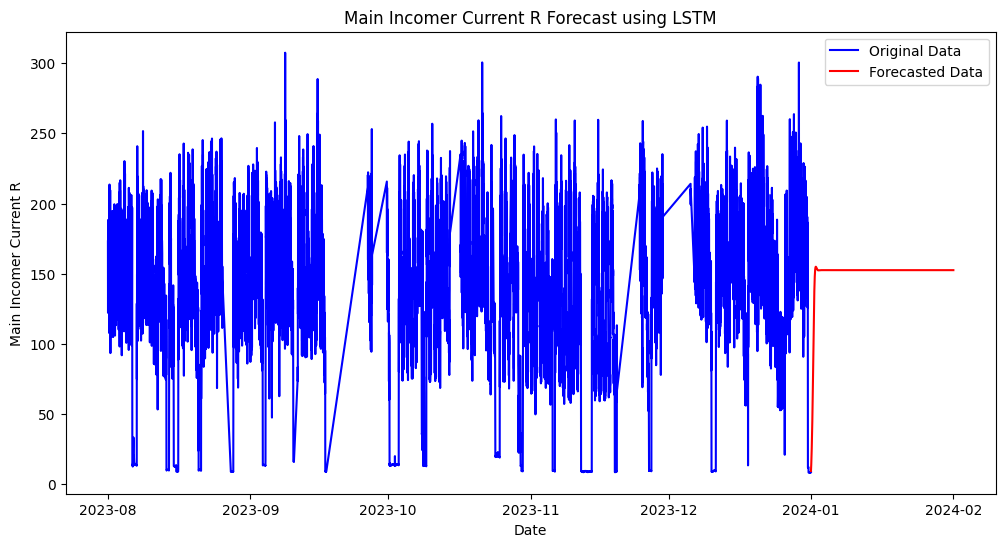

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the data
file_path = '/content/Main_incomer_MFM_2024-02-07-18-59-33.csv'
df = pd.read_csv(file_path)

# Convert the 'Timestamp' column to datetime with the correct format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y %H:%M')

# Filter the data for August to December
filtered_data = df[(df['Timestamp'].dt.month >= 8) & (df['Timestamp'].dt.month <= 12)]

# Handle missing values if any
filtered_data = filtered_data.fillna(method='ffill')

# Use the 'Main incomer Current R' column for predictions (remove trailing space)
data = filtered_data['Main incomer Current R'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Function to create sequences of data
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        label = data[i+sequence_length]
        sequences.append(sequence)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 60  # e.g., using past 60 time steps to predict the next step
X, y = create_sequences(scaled_data, sequence_length)

# Reshape the data for LSTM [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on the full data
model.fit(X, y, epochs=20, batch_size=32)

# Forecasting from January 1st to January 31st with 15-minute intervals
forecast_days = 31
forecast_intervals = int(24 * 60 / 15)  # Number of 15-minute intervals in a day

# Initialize an array to store forecasted values
forecast = np.zeros((forecast_days * forecast_intervals, 1))

# Use the last sequence of data from the original dataset to start forecasting
current_sequence = scaled_data[-sequence_length:].reshape((1, sequence_length, 1))

# Iterate through each time interval and predict the next value
for i in range(len(forecast)):
    predicted_value = model.predict(current_sequence)
    forecast[i] = predicted_value

    # Update the current sequence to include the predicted value and drop the first value
    current_sequence = np.append(current_sequence[:, 1:, :], predicted_value.reshape(1, 1, 1), axis=1)

# Inverse transform the forecasted values to get actual values
forecast = scaler.inverse_transform(forecast)

# Generate timestamps for the forecasted period
forecast_timestamps = pd.date_range(start='2024-01-01', periods=len(forecast), freq='15T')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['Timestamp'], scaler.inverse_transform(scaled_data), label='Original Data', color='blue')
plt.plot(forecast_timestamps, forecast, label='Forecasted Data', color='red')
plt.title('Main Incomer Current R Forecast using LSTM')
plt.xlabel('Date')
plt.ylabel('Main Incomer Current R')
plt.legend()
plt.show()


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 37ms/step


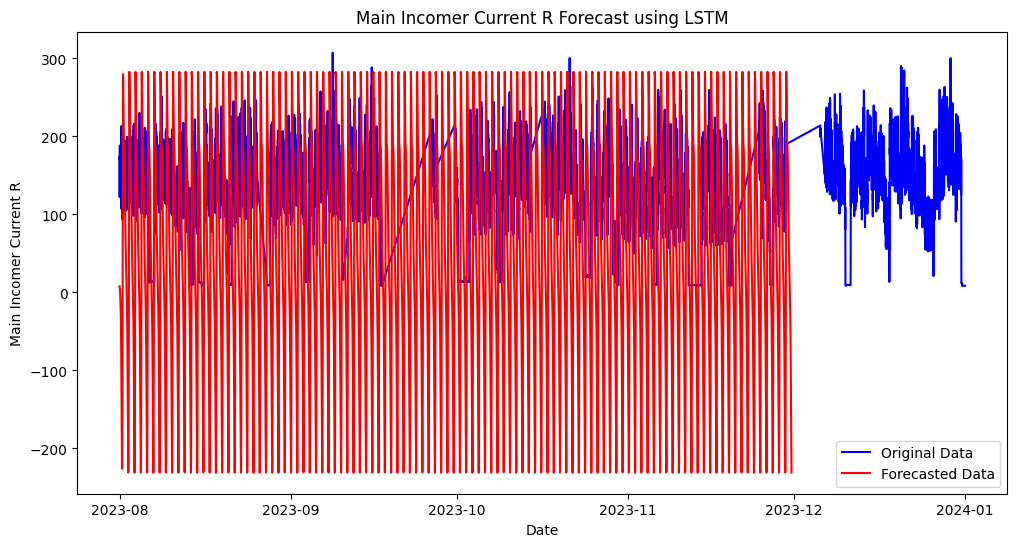

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the data
file_path = '/content/Main_incomer_MFM_2024-02-07-18-59-33.csv'
df = pd.read_csv(file_path)

# Convert the 'Timestamp' column to datetime with the correct format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y %H:%M')

# Filter the data for August to December
filtered_data = df[(df['Timestamp'].dt.month >= 8) & (df['Timestamp'].dt.month <= 12)]

# Handle missing values if any
filtered_data = filtered_data.fillna(method='ffill')

# Use the 'Main incomer Current R' column for predictions (remove trailing space)
data = filtered_data['Main incomer Current R'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Function to create sequences of data
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        label = data[i+sequence_length]
        sequences.append(sequence)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 60  # e.g., using past 60 time steps to predict the next step
X, y = create_sequences(scaled_data, sequence_length)

# Reshape the data for LSTM [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on the full data
model.fit(X, y, epochs=20, batch_size=32)

# Forecasting for the entire dataset
forecast_days = len(filtered_data)  # Forecasting for the entire dataset length
forecast_intervals = 1  # Since you want to forecast point-by-point

# Initialize an array to store forecasted values
forecast = np.zeros((forecast_days, 1))

# Use the last sequence of data from the original dataset to start forecasting
current_sequence = scaled_data[-sequence_length:].reshape((1, sequence_length, 1))

# Iterate through each time interval and predict the next value
for i in range(len(forecast)):
    predicted_value = model.predict(current_sequence)
    forecast[i] = predicted_value

    # Update the current sequence to include the predicted value and drop the first value
    current_sequence = np.append(current_sequence[:, 1:, :], predicted_value.reshape(1, 1, 1), axis=1)

# Inverse transform the forecasted values to get actual values
forecast = scaler.inverse_transform(forecast)

# Generate timestamps for the forecasted period
forecast_timestamps = pd.date_range(start=filtered_data['Timestamp'].iloc[0], periods=len(forecast), freq='15T')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['Timestamp'], scaler.inverse_transform(scaled_data), label='Original Data', color='blue')
plt.plot(forecast_timestamps, forecast, label='Forecasted Data', color='red')
plt.title('Main Incomer Current R Forecast using LSTM')
plt.xlabel('Date')
plt.ylabel('Main Incomer Current R')
plt.legend()
plt.show()


In [ ]:
import os
import openai
import re
from translate import Translator
from pydub import AudioSegment
import speech_recognition as sr

# Set the OpenAI API key (replace with your actual key)
os.environ["OPENAI_API_KEY"] = ""
openai.api_key = os.getenv("OPENAI_API_KEY")

def extract_locations(user_input):
    # Regular expressions to extract locations from input
    patterns = [
        re.compile(r"take me from\s+(.+?)\s+to\s+(.+)", re.IGNORECASE),
        re.compile(r"from\s+(.+?)\s+to\s+(.+)", re.IGNORECASE),
        re.compile(r"i want to go from\s+(.+?)\s+to\s+(.+)", re.IGNORECASE)
    ]

    for pattern in patterns:
        match = pattern.search(user_input)
        if match:
            start_location = match.group(1).strip()
            end_location = match.group(2).strip()
            return start_location, end_location
    return None, None

def generate_route_description(start_location, end_location):
    # Prompt for the OpenAI API
    prompt = f"Provide a detailed driving route from {start_location} to {end_location}. Include major turns, landmarks, and distances."

    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ]
    )

    return response.choices[0].message['content'].strip()

def translate_description(route_description, target_language):
    if target_language == 'en':
        return route_description  # No translation needed if English is selected

    # Initialize translator
    translator = Translator(to_lang=target_language)

    # Split route description into manageable chunks (e.g., sentences)
    sentences = route_description.split('. ')
    translated_sentences = []

    # Translate each sentence and join them back together
    for sentence in sentences:
        translated_sentence = translator.translate(sentence)
        translated_sentences.append(translated_sentence)

    translated_description = '. '.join(translated_sentences)

    return translated_description

def transcribe_audio(audio_path):
    recognizer = sr.Recognizer()
    audio = AudioSegment.from_file(audio_path)
    audio.export("temp.wav", format="wav")
    with sr.AudioFile("temp.wav") as source:
        audio_data = recognizer.record(source)
        text = recognizer.recognize_whisper(audio_data, model="base")
    return text

# Run the chatbot
print("Greetings! I am SARATHI, developed by NIT Calicut students.")
while True:
    input_type = input("Enter 'text' for text input or 'audio' for audio input (type 'exit' to quit): ").lower()

    if input_type == 'exit':
        print('Exiting')
        break

    elif input_type == 'text':
        user_input = input("Enter your request: ")

        start_location, end_location = extract_locations(user_input)
        if not start_location or not end_location:
            print("Invalid input format. Please use phrases like 'take me from [start location] to [end location]', 'from [start location] to [end location]', or 'I want to go from [start location] to [end location]'.")
            continue

        route_description = generate_route_description(start_location, end_location)
        print("Route Description (in English):", route_description)

        target_language = input("Enter language code for translation (e.g., 'hi' for Hindi): ").lower()
        translated_description = translate_description(route_description, target_language)
        print(f"Route Description (in {target_language}):", translated_description)

    elif input_type == 'audio':
        audio_path = input("Enter the path to the audio file: ")

        try:
            user_input = transcribe_audio(audio_path)
            print(f"Transcribed Text: {user_input}")

            start_location, end_location = extract_locations(user_input)
            if not start_location or not end_location:
                print("Invalid input format from audio transcription.")
                continue

            route_description = generate_route_description(start_location, end_location)
            print("Route Description (in English):", route_description)

            target_language = input("Enter language code for translation (e.g., 'hi' for Hindi): ").lower()
            translated_description = translate_description(route_description, target_language)
            print(f"Route Description (in {target_language}):", translated_description)

        except Exception as e:
            print(f"Error processing audio: {str(e)}")
            continue

    else:
        print("Invalid input. Please enter 'text' or 'audio'.")


Greetings! I am SARATHI, developed by NIT Calicut students.
Enter 'text' for text input or 'audio' for audio input (type 'exit' to quit): text
Enter your request: provide route from kannur to kozhikode
Route Description (in English): Certainly! The driving route from Kannur to Kozhikode is about 95 kilometers long and takes approximately 2 to 3 hours, depending on traffic conditions. Here is a detailed route with major turns, landmarks, and approximate distances:

1. Start from Kannur and head south on NH 66 (also known as Kochi-Panvel Highway).
2. After about 10 kilometers, you will pass through Thalassery. Continue on NH 66.
3. About 30 kilometers from Kannur, you will reach Mahe. Stay on NH 66.
4. After driving about 30 more kilometers, you will approach Vadakara. Continue on NH 66.
5. Around 10 kilometers after Vadakara, you will reach the Feroke Bridge on the outskirts of Kozhikode city.
6. Cross the Feroke Bridge and continue straight on NH 66.
7. Drive for another 10 kilometers,

In [ ]:
import os
import openai
import re
from translate import Translator
from pydub import AudioSegment
import speech_recognition as sr

# Set the OpenAI API key (replace with your actual key)
os.environ["OPENAI_API_KEY"] = ""
openai.api_key = os.getenv("OPENAI_API_KEY")

def extract_locations(user_input):
    # Regular expressions to extract locations from input
    patterns = [
        re.compile(r"take me from\s+(.+?)\s+to\s+(.+)", re.IGNORECASE),
        re.compile(r"from\s+(.+?)\s+to\s+(.+)", re.IGNORECASE),
        re.compile(r"i want to go from\s+(.+?)\s+to\s+(.+)", re.IGNORECASE)
    ]

    for pattern in patterns:
        match = pattern.search(user_input)
        if match:
            start_location = match.group(1).strip()
            end_location = match.group(2).strip()
            return start_location, end_location
    return None, None

def generate_route_description(start_location, end_location):
    # Prompt for the OpenAI API
    prompt = f"Provide a detailed driving route from {start_location} to {end_location}. Include major turns, landmarks, and distances."

    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ]
    )

    return response.choices[0].message['content'].strip()

def translate_description(route_description, target_language):
    if target_language == 'en':
        return route_description  # No translation needed if English is selected

    # Initialize translator
    translator = Translator(to_lang=target_language)

    # Split route description into manageable chunks (e.g., sentences)
    def chunks(lst, n):
        for i in range(0, len(lst), n):
            yield lst[i:i + n]

    sentences = route_description.split('. ')
    translated_sentences = []

    # Translate each chunk of sentences and join them back together
    for chunk in chunks(sentences, 5):  # Limiting to 5 sentences per chunk to avoid length issues
        chunk_text = '. '.join(chunk)
        translated_chunk = translator.translate(chunk_text)
        translated_sentences.append(translated_chunk)

    translated_description = '. '.join(translated_sentences)

    return translated_description

def transcribe_audio(audio_path):
    recognizer = sr.Recognizer()
    audio = AudioSegment.from_file(audio_path)
    audio.export("temp.wav", format="wav")
    with sr.AudioFile("temp.wav") as source:
        audio_data = recognizer.record(source)
        text = recognizer.recognize_whisper(audio_data, model="base")
    return text

# Run the chatbot
print("Greetings! I am SARATHI, developed by NIT Calicut students.")
while True:
    input_type = input("Enter 'text' for text input or 'audio' for audio input (type 'exit' to quit): ").lower()

    if input_type == 'exit':
        print('Exiting')
        break

    elif input_type == 'text':
        user_input = input("Enter your request: ")

        start_location, end_location = extract_locations(user_input)
        if not start_location or not end_location:
            print("Invalid input format. Please use phrases like 'take me from [start location] to [end location]', 'from [start location] to [end location]', or 'I want to go from [start location] to [end location]'.")
            continue

        route_description = generate_route_description(start_location, end_location)
        print("Route Description (in English):", route_description)

        if len(route_description) > 500:
            print("Route description exceeds 500 characters. Please provide a shorter request.")
            continue

        target_language = input("Enter language code for translation (e.g., 'hi' for Hindi): ").lower()
        translated_description = translate_description(route_description, target_language)
        print(f"Route Description (in {target_language}):", translated_description)

    elif input_type == 'audio':
        audio_path = input("Enter the path to the audio file: ")

        try:
            user_input = transcribe_audio(audio_path)
            print(f"Transcribed Text: {user_input}")

            start_location, end_location = extract_locations(user_input)
            if not start_location or not end_location:
                print("Invalid input format from audio transcription.")
                continue

            route_description = generate_route_description(start_location, end_location)
            print("Route Description (in English):", route_description)

            if len(route_description) > 500:
                print("Route description exceeds 500 characters. Please provide a shorter request.")
                continue

            target_language = input("Enter language code for translation (e.g., 'hi' for Hindi): ").lower()
            translated_description = translate_description(route_description, target_language)
            print(f"Route Description (in {target_language}):", translated_description)

        except Exception as e:
            print(f"Error processing audio: {str(e)}")
            continue

    else:
        print("Invalid input. Please enter 'text' or 'audio'.")


Greetings! I am SARATHI, developed by NIT Calicut students.
Enter 'text' for text input or 'audio' for audio input (type 'exit' to quit): audio
Enter the path to the audio file: /content/record1.in-speech.mp3
Transcribed Text:  Provide route from Mumbai to Puna.
Route Description (in English): Sure! The route from Mumbai to Pune is approximately 150 kilometers and can take around 3 to 4 hours, depending on traffic conditions. Here is a detailed driving route from Mumbai to Pune:

1. **Starting Point - Mumbai**:
   - Start from Mumbai and head towards the Mumbai-Pune Expressway. You can take the Eastern Express Highway or Western Express Highway to reach the expressway.

2. **Kharghar Toll Plaza**:
   - After around 35-40 kilometers on the expressway, you will come across the Kharghar Toll Plaza. Pay the toll and continue on the Mumbai-Pune Expressway.

3. **Lonavala/Khandala Exit (optional)**:
   - After driving for about 70-80 kilometers, you will see the exit for Lonavala/Khandala. I

In [ ]:
udio


In [ ]:
import os
import openai
import re
from translate import Translator
from pydub import AudioSegment
import speech_recognition as sr

# Set the OpenAI API key (replace with your actual key)
os.environ["OPENAI_API_KEY"] = ""
openai.api_key = os.getenv("OPENAI_API_KEY")

def extract_locations(user_input):
    # Regular expressions to extract locations from input
    patterns = [
        re.compile(r"take me from\s+(.+?)\s+to\s+(.+)", re.IGNORECASE),
        re.compile(r"from\s+(.+?)\s+to\s+(.+)", re.IGNORECASE),
        re.compile(r"i want to go from\s+(.+?)\s+to\s+(.+)", re.IGNORECASE)
    ]

    for pattern in patterns:
        match = pattern.search(user_input)
        if match:
            start_location = match.group(1).strip()
            end_location = match.group(2).strip()
            return start_location, end_location
    return None, None

def generate_route_description(start_location, end_location):
    # Prompt for the OpenAI API
    prompt = f"Provide a detailed driving route from {start_location} to {end_location}. Include major turns, landmarks, and distances."

    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ]
    )

    return response.choices[0].message['content'].strip()

def translate_description(route_description, target_language):
    if target_language == 'en':
        return route_description  # No translation needed if English is selected

    # Initialize translator
    translator = Translator(to_lang=target_language)

    # Split route description into chunks of approximately 500 characters
    def chunks(lst, max_chunk_length):
        chunk = []
        current_length = 0
        for sentence in lst:
            sentence_length = len(sentence)
            if current_length + sentence_length > max_chunk_length:
                yield ' '.join(chunk)
                chunk = [sentence]
                current_length = sentence_length
            else:
                chunk.append(sentence)
                current_length += sentence_length + 1  # Adding 1 for the space between sentences
        if chunk:
            yield ' '.join(chunk)

    sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', route_description)
    translated_sentences = []

    # Translate each chunk of sentences and join them back together
    for chunk in chunks(sentences, 500):
        translated_chunk = translator.translate(chunk)
        translated_sentences.append(translated_chunk)

    translated_description = ' '.join(translated_sentences)

    return translated_description

def transcribe_audio(audio_path):
    recognizer = sr.Recognizer()
    audio = AudioSegment.from_file(audio_path)
    audio.export("temp.wav", format="wav")
    with sr.AudioFile("temp.wav") as source:
        audio_data = recognizer.record(source)
        text = recognizer.recognize_whisper(audio_data, model="base")
    return text

# Run the chatbot
print("Greetings! I am SARATHI, developed by NIT Calicut students.")
while True:
    input_type = input("Enter 'text' for text input or 'audio' for audio input (type 'exit' to quit): ").lower()

    if input_type == 'exit':
        print('Exiting')
        break

    elif input_type == 'text':
        user_input = input("Enter your request: ")

        start_location, end_location = extract_locations(user_input)
        if not start_location or not end_location:
            print("Invalid input format. Please use phrases like 'take me from [start location] to [end location]', 'from [start location] to [end location]', or 'I want to go from [start location] to [end location]'.")
            continue

        route_description = generate_route_description(start_location, end_location)
        print("Route Description (in English):", route_description)

        target_language = input("Enter language code for translation (e.g., 'hi' for Hindi): ").lower()
        translated_description = translate_description(route_description, target_language)
        print(f"Route Description (in {target_language}):", translated_description)

    elif input_type == 'audio':
        audio_path = input("Enter the path to the audio file: ")

        try:
            user_input = transcribe_audio(audio_path)
            print(f"Transcribed Text: {user_input}")

            start_location, end_location = extract_locations(user_input)
            if not start_location or not end_location:
                print("Invalid input format from audio transcription.")
                continue

            route_description = generate_route_description(start_location, end_location)
            print("Route Description (in English):", route_description)

            target_language = input("Enter language code for translation (e.g., 'hi' for Hindi): ").lower()
            translated_description = translate_description(route_description, target_language)
            print(f"Route Description (in {target_language}):", translated_description)

        except Exception as e:
            print(f"Error processing audio: {str(e)}")
            continue

    else:
        print("Invalid input. Please enter 'text' or 'audio'.")


Greetings! I am SARATHI, developed by NIT Calicut students.
Enter 'text' for text input or 'audio' for audio input (type 'exit' to quit): text
Enter your request: from mumbai to pune
Route Description (in English): Sure! Here is a detailed driving route from Mumbai to Pune:

1. Start in Mumbai and get on the Mumbai-Pune Expressway from the nearest entry point.
2. Drive on the Mumbai-Pune Expressway for approximately 93 miles (150 km).
3. Keep driving on the Expressway until you reach the Lonavala exit. Take the Lonavala exit to merge onto Old Mumbai Pune Highway/State Highway 54.
4. Continue on the Old Mumbai Pune Highway for 6.5 miles (10.5 km) until you reach Lonavala town.
5. In Lonavala, drive through the town on the Old Mumbai Pune Highway.
6. As you exit Lonavala, continue on the Old Mumbai Pune Highway for another 26 miles (42 km) towards Pune.
7. Pass through the towns of Kamshet and Talegaon Dabhade on the way to Pune.
8. As you approach Pune, you will pass by Pune University 

In [ ]:
!pip install pyaudio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pyaudio (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pyaudio
Failed to build pyaudio
ERROR: Could not build wheels for pyaudio, which is required to install pyproject.toml-based projects


In [ ]:
import os
import openai
import re
from translate import Translator
from pydub import AudioSegment
import speech_recognition as sr
import pyaudio
import wave

# Set the OpenAI API key (replace with your actual key)
os.environ["OPENAI_API_KEY"] = ""
openai.api_key = os.getenv("OPENAI_API_KEY")

def extract_locations(user_input):
    # Regular expressions to extract locations from input
    patterns = [
        re.compile(r"take me from\s+(.+?)\s+to\s+(.+)", re.IGNORECASE),
        re.compile(r"from\s+(.+?)\s+to\s+(.+)", re.IGNORECASE),
        re.compile(r"i want to go from\s+(.+?)\s+to\s+(.+)", re.IGNORECASE)
    ]

    for pattern in patterns:
        match = pattern.search(user_input)
        if match:
            start_location = match.group(1).strip()
            end_location = match.group(2).strip()
            return start_location, end_location
    return None, None

def generate_route_description(start_location, end_location):
    # Prompt for the OpenAI API
    prompt = f"Provide a detailed driving route from {start_location} to {end_location}. Include major turns, landmarks, and distances."

    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ]
    )

    return response.choices[0].message['content'].strip()

def translate_description(route_description, target_language):
    if target_language == 'en':
        return route_description  # No translation needed if English is selected

    # Initialize translator
    translator = Translator(to_lang=target_language)

    # Split route description into chunks of approximately 500 characters
    def chunks(lst, max_chunk_length):
        chunk = []
        current_length = 0
        for sentence in lst:
            sentence_length = len(sentence)
            if current_length + sentence_length > max_chunk_length:
                yield ' '.join(chunk)
                chunk = [sentence]
                current_length = sentence_length
            else:
                chunk.append(sentence)
                current_length += sentence_length + 1  # Adding 1 for the space between sentences
        if chunk:
            yield ' '.join(chunk)

    sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', route_description)
    translated_sentences = []

    # Translate each chunk of sentences and join them back together
    for chunk in chunks(sentences, 500):
        translated_chunk = translator.translate(chunk)
        translated_sentences.append(translated_chunk)

    translated_description = ' '.join(translated_sentences)

    return translated_description

def transcribe_audio():
    # Initialize PyAudio
    audio = pyaudio.PyAudio()

    # Define parameters for audio recording
    format = pyaudio.paInt16
    channels = 1
    rate = 16000  # Sample rate
    chunk = 1024  # Size of each audio chunk

    # Create an input stream
    stream = audio.open(format=format,
                        channels=channels,
                        rate=rate,
                        input=True,
                        frames_per_buffer=chunk)

    print("Recording audio...")

    frames = []

    # Record audio in chunks and save to frames list
    while True:
        try:
            data = stream.read(chunk)
            frames.append(data)
        except KeyboardInterrupt:
            print("Recording stopped.")
            break

    # Stop and close the audio stream
    stream.stop_stream()
    stream.close()
    audio.terminate()

    # Save the recorded audio to a WAV file
    wave_output_file = "recorded_audio.wav"
    with wave.open(wave_output_file, 'wb') as wf:
        wf.setnchannels(channels)
        wf.setsampwidth(audio.get_sample_size(format))
        wf.setframerate(rate)
        wf.writeframes(b''.join(frames))

    return wave_output_file

# Run the chatbot
print("Greetings! I am SARATHI, developed by NIT Calicut students.")
while True:
    input_type = input("Enter 'text' for text input or 'audio' for audio input (type 'exit' to quit): ").lower()

    if input_type == 'exit':
        print('Exiting')
        break

    elif input_type == 'text':
        user_input = input("Enter your request: ")

        start_location, end_location = extract_locations(user_input)
        if not start_location or not end_location:
            print("Invalid input format. Please use phrases like 'take me from [start location] to [end location]', 'from [start location] to [end location]', or 'I want to go from [start location] to [end location]'.")
            continue

        route_description = generate_route_description(start_location, end_location)
        print("Route Description (in English):", route_description)

        target_language = input("Enter language code for translation (e.g., 'hi' for Hindi): ").lower()
        translated_description = translate_description(route_description, target_language)
        print(f"Route Description (in {target_language}):", translated_description)

    elif input_type == 'audio':
        try:
            audio_file = transcribe_audio()
            print(f"Audio recording saved to: {audio_file}")

            # Perform transcription and further processing with the recorded audio
            user_input = transcribe_audio(audio_file)
            print(f"Transcribed Text: {user_input}")

            start_location, end_location = extract_locations(user_input)
            if not start_location or not end_location:
                print("Invalid input format from audio transcription.")
                continue

            route_description = generate_route_description(start_location, end_location)
            print("Route Description (in English):", route_description)

            target_language = input("Enter language code for translation (e.g., 'hi' for Hindi): ").lower()
            translated_description = translate_description(route_description, target_language)
            print(f"Route Description (in {target_language}):", translated_description)

        except Exception as e:
            print(f"Error processing audio: {str(e)}")
            continue

    else:
        print("Invalid input. Please enter 'text' or 'audio'.")


ModuleNotFoundError: No module named 'pyaudio'

In [ ]:
!pip install openai==0.28

In [ ]:
!pip install openai-whisper

In [ ]:
import os
import openai
import re
from translate import Translator

# Set the OpenAI API key (replace with your actual key)
os.environ["OPENAI_API_KEY"] = ""
openai.api_key = os.getenv("OPENAI_API_KEY")

def extract_locations(user_input):
    # Regular expressions to extract locations from input
    patterns = [
        re.compile(r"take me from\s+(.+?)\s+to\s+(.+)", re.IGNORECASE),
        re.compile(r"from\s+(.+?)\s+to\s+(.+)", re.IGNORECASE),
        re.compile(r"i want to go from\s+(.+?)\s+to\s+(.+)", re.IGNORECASE)
    ]

    for pattern in patterns:
        match = pattern.search(user_input)
        if match:
            start_location = match.group(1).strip()
            end_location = match.group(2).strip()
            return start_location, end_location
    return None, None

def generate_route_description(start_location, end_location):
    # Prompt for the OpenAI API
    prompt = f"Provide a detailed driving route from {start_location} to {end_location}. Include major turns, landmarks, and distances."

    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ]
    )

    return response.choices[0].message['content'].strip()

def translate_description(route_description, target_language):
    if target_language == 'en':
        return route_description  # No translation needed if English is selected

    # Initialize translator
    translator = Translator(to_lang=target_language)

    # Split route description into manageable chunks (e.g., sentences)
    sentences = route_description.split('. ')
    translated_sentences = []

    # Translate each sentence and join them back together
    for sentence in sentences:
        translated_sentence = translator.translate(sentence)
        translated_sentences.append(translated_sentence)

    translated_description = '. '.join(translated_sentences)

    return translated_description

# Run the chatbot in a loop
print("Greetings! I am SARATHI, developed by NIT Calicut students. Type 'exit' to quit.")
while True:
    user_input = input("Enter your request: ")
    if user_input.lower() == 'exit':
        print('Exiting')
        break

    start_location, end_location = extract_locations(user_input)
    if not start_location or not end_location:
        print("Invalid input format. Please use phrases like 'take me from [start location] to [end location]', 'from [start location] to [end location]', or 'I want to go from [start location] to [end location]'.")
        continue

    route_description = generate_route_description(start_location, end_location)
    print("Route Description (in English):", route_description)

    # Ask user for desired language for route description
    target_language = input("Enter language code for translation (e.g., 'hi' for Hindi): ").lower()

    translated_description = translate_description(route_description, target_language)
    print(f"Route Description (in {target_language}):",translated_description)

Greetings! I am SARATHI, developed by NIT Calicut students. Type 'exit' to quit.


KeyboardInterrupt: Interrupted by user

In [ ]:
import pandas as pd
import openai

# Set your OpenAI API key
api_key = ""
openai.api_key = api_key

# Load the dataset
file_path = '/content/cleaned_first_100_issues.csv'
data = pd.read_csv(file_path)

# Function to chunk the messages
def chunk_messages(messages, max_tokens=1500):
    chunked_messages = []
    current_chunk = []

    for message in messages:
        if len(" ".join(current_chunk)) + len(message['content']) <= max_tokens:
            current_chunk.append(message)
        else:
            chunked_messages.append(current_chunk)
            current_chunk = [message]

    if current_chunk:
        chunked_messages.append(current_chunk)

    return chunked_messages

# Prepare training data
# Each training example should be a separate message object
messages = [{"role": "system", "content": "You are a helpful assistant."}]
for _, row in data.iterrows():
    prompt = (
        f"Issue Title: {row['title']}\n"
        f"Issue Body: {row['body']}\n"
        f"Issue Labels: {row['labels']}\n"
        f"Issue URL: {row['issue_url']}\n"
        f"Repository URL: {row['repository_url']}\n"
        f"Language: {row['language']}\n"
        "Response:"
    )
    messages.append({"role": "user", "content": prompt})  # Add each prompt as a user message

# Chunk the messages
chunked_messages = chunk_messages(messages)

# Train the language model
# Pass each chunk of messages to the API sequentially
for chunk in chunked_messages:
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=chunk,
        max_tokens=1500,  # Adjust as per your needs
        temperature=0.7,  # Adjust as per your needs
        stop=["\n"]
    )

print("Training completed.")


TypeError: sequence item 0: expected str instance, dict found

In [ ]:
import pandas as pd
import openai

# Set your OpenAI API key
api_key = ""
openai.api_key = api_key

# Load the dataset
file_path = '/content/cleaned_first_100_issues.csv'
data = pd.read_csv(file_path)

# Prepare training data
messages = [{"role": "system", "content": "You are a helpful assistant."}]
for _, row in data.iterrows():
    prompt = (
        f"Issue Title: {row['title']}\n"
        f"Issue Body: {row['body']}\n"
        f"Issue Labels: {row['labels']}\n"
        f"Issue URL: {row['issue_url']}\n"
        f"Repository URL: {row['repository_url']}\n"
        f"Language: {row['language']}\n"
        "Response:"
    )
    messages.append({"role": "user", "content": prompt})  # Add each prompt as a user message

# Function to chunk the messages
def chunk_messages(messages, max_tokens=1500):
    chunked_messages = []
    current_chunk = []

    for message in messages:
        if len(" ".join(current_chunk)) + len(message['content']) <= max_tokens:
            current_chunk.append(message)
        else:
            chunked_messages.append(current_chunk)
            current_chunk = [message]

    if current_chunk:
        chunked_messages.append(current_chunk)

    return chunked_messages

# Chunk the messages
chunked_messages = chunk_messages(messages)

# Train the language model (gpt-4)
for chunk in chunked_messages:
    response = openai.ChatCompletion.create(
        model="text-davinci-002",
        messages=chunk,
        max_tokens=1500,  # Adjust as per your needs
        temperature=0.7,  # Adjust as per your needs
        stop=["\n"]
    )

print("Training completed.")


TypeError: sequence item 0: expected str instance, dict found

In [ ]:
!pip install transformers pandas


In [ ]:
import pandas as pd
from transformers import GPTNeoForCausalLM, GPT2Tokenizer
from transformers import TextDataset, DataCollatorForLanguageModeling, Trainer, TrainingArguments

# Set your OpenAI API key if needed
api_key = ""

# Load the dataset
file_path = '/content/cleaned_first_100_issues.csv'
data = pd.read_csv(file_path)

# Prepare training data
messages = []
for _, row in data.iterrows():
    prompt = (
        f"Issue Title: {row['title']}\n"
        f"Issue Body: {row['body']}\n"
        f"Issue Labels: {row['labels']}\n"
        f"Issue URL: {row['issue_url']}\n"
        f"Repository URL: {row['repository_url']}\n"
        f"Language: {row['language']}\n"
        "Response:"
    )
    messages.append(prompt)

# Initialize GPT-Neo tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained("EleutherAI/gpt-neo-2.7B")
model = GPTNeoForCausalLM.from_pretrained("EleutherAI/gpt-neo-2.7B")

# Tokenize the training data
tokenized_datasets = TextDataset(
    tokenizer=tokenizer,
    texts=messages,
    block_size=128  # Adjust block size as per your needs
)

# Prepare data collator and training arguments
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=False
)

training_args = TrainingArguments(
    per_device_train_batch_size=1,  # Adjust batch size as per your GPU memory
    num_train_epochs=1,  # Number of training epochs
    logging_dir='./logs',
    logging_steps=500,
    save_steps=1000,
    save_total_limit=2,
    overwrite_output_dir=True,
    prediction_loss_only=True,
)

# Trainer to train the model
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets,
    data_collator=data_collator,
)

# Start training
trainer.train()

print("Training completed.")


TypeError: TextDataset.__init__() got an unexpected keyword argument 'texts'

In [ ]:
!pip install datasets


In [ ]:
import pandas as pd
from transformers import GPTNeoForCausalLM, GPT2Tokenizer
from datasets import Dataset
from transformers import Trainer, TrainingArguments, DataCollatorForLanguageModeling

# Set your OpenAI API key if needed
api_key = ""

# Load the dataset
file_path = '/content/cleaned_first_100_issues.csv'
data = pd.read_csv(file_path)

# Prepare training data
dataset = Dataset.from_pandas(data)

# Initialize GPT-Neo tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained("EleutherAI/gpt-neo-2.7B")
model = GPTNeoForCausalLM.from_pretrained("EleutherAI/gpt-neo-2.7B")

# Tokenize the training data
def tokenize_function(examples):
    # Tokenize title and body separately
    title_tokens = tokenizer(examples["title"], return_tensors="pt", max_length=256, truncation=True, padding='max_length')
    body_tokens = tokenizer(examples["body"], return_tensors="pt", max_length=256, truncation=True, padding='max_length')

    # Combine the tokenized inputs
    return {
        'input_ids': torch.cat((title_tokens['input_ids'], body_tokens['input_ids']), dim=1),
        'attention_mask': torch.cat((title_tokens['attention_mask'], body_tokens['attention_mask']), dim=1)
    }

tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Prepare data collator and training arguments
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=False
)

training_args = TrainingArguments(
    per_device_train_batch_size=1,  # Adjust batch size as per your GPU memory
    num_train_epochs=1,  # Number of training epochs
    logging_dir='./logs',
    logging_steps=500,
    save_steps=1000,
    save_total_limit=2,
    overwrite_output_dir=True,
    prediction_loss_only=True,
)

# Trainer to train the model
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    data_collator=data_collator,
)

# Start training
trainer.train()

print("Training completed.")

In [ ]:
import os
import openai
from langchain.chains import LLMChain
from langchain.llms import OpenAI
from langchain.prompts import PromptTemplate
import pandas as pd
os.environ["OPENAI_API_KEY"] = ""
openai.api_key = os.getenv("OPENAI_API_KEY")

# Load your dataset (assuming it's already cleaned and prepared)
file_path = '/content/cleaned_first_100_issues.csv'
data = pd.read_csv(file_path)

# Initialize the language model (assuming OpenAI GPT-3.5)
llm = OpenAI()

# Define a prompt template for question asking
prompt_template = PromptTemplate(
    input_variables=["question"],
    template=(
        "Question: {question}\n"
        "Response:"
    )
)

# Create LLMChain for conversational bot
question_answering_chain = LLMChain(llm=llm, prompt=prompt_template)

# Example interaction loop with the chatbot
print("Welcome to the Dataset Question Bot!")
print("You can ask questions about the dataset or type 'exit' to quit.")

while True:
    user_input = input("Ask a question or type 'exit': ").strip()

    if user_input.lower() == 'exit':
        print('Exiting...')
        break

    # Prepare user query
    user_query = {
        "question": user_input.strip()
    }

    # Get response from the chatbot
    response = question_answering_chain.run(user_query)

    print("Bot Response:")
    print(response)
    print("-------------------------------------------")


/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 0.3.0. Use RunnableSequence, e.g., `prompt | llm` instead.
  warn_deprecated(


Welcome to the Dataset Question Bot!
You can ask questions about the dataset or type 'exit' to quit.
Ask a question or type 'exit': provide details about optimised images


/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


Bot Response:
 Optimized images are digital images that have been optimized for web use to reduce their file size without compromising their quality. This is done by compressing the image file, removing unnecessary metadata, and resizing the image to the optimal dimensions for web display. Optimized images are important for improving website performance, as they load faster and use less bandwidth. This leads to a better user experience and can also improve search engine rankings. There are various tools and techniques available to optimize images, such as using file formats like JPEG, PNG, or WebP, using compression software, and optimizing image dimensions. By using optimized images, website owners can provide a visually appealing experience to their users while also improving website speed and performance.
-------------------------------------------


KeyboardInterrupt: Interrupted by user

In [ ]:
import os
os.environ["OPENAI_API_KEY"] = ""

In [ ]:
from langchain_experimental.agents.agent_toolkits import create_csv_agent
from langchain_openai import ChatOpenAI

In [ ]:
agent_executer.invoke("what issues were faced in optimised images?")

NameError: name 'agent_executer' is not defined

In [ ]:
llm = ChatOpenAI(temperature=0.5)
agent_executer = create_csv_agent(llm, '/content/cleaned_first_100_issues.csv', verbose=True)

AttributeError: module 'openai' has no attribute 'OpenAI'

In [ ]:
import pandas as pd
import openai
from langchain_openai import OpenAIEmbeddings
from langchain_openai import ChatOpenAI
from langchain.chains.conversation.memory import ConversationBufferWindowMemory
from langchain.docstore.document import Document
from langchain.chains import RetrievalQA
from langchain.vectorstores import faiss
from langchain.agents import Tool
from langchain.agents import initialize_agent
from langchain import hub
from langchain.agents import AgentExecutor, create_react_agent
from tqdm.auto import tqdm
from uuid import uuid4
import pandas as pd
from dotenv import load_dotenv
import os

In [ ]:
import pandas as pd

# Read the CSV file containing question-answer pairs and store it in a DataFrame called qa
qa = pd.read_csv("/content/cleaned_first_100_issues.csv")

# Display the first few rows of the DataFrame to ensure data has been read properly
qa.head()

,title,labels,body,issue_url,repository_url,language
0,Added python code example for parking lot,"[{""name:"": ""needs-review"", ""description:"": ""no...",…sign\n\n## Review the Contributing Guidelines...,https://api.github.com/repos/donnemartin/syste...,https://api.github.com/repos/donnemartin/syste...,en
1,Optimised Images,"[{""name:"": ""needs-review"", ""description:"": ""no...",## Review the Contributing Guidelines\n\nBefor...,https://api.github.com/repos/donnemartin/syste...,https://api.github.com/repos/donnemartin/syste...,en
2,de: Add translation,"[{""name:"": ""needs-review"", ""description:"": ""no...",## Review the Contributing Guidelines\n\nBefor...,https://api.github.com/repos/donnemartin/syste...,https://api.github.com/repos/donnemartin/syste...,en
3,small changes,"[{""name:"": ""needs-review"", ""description:"": ""no...",## Review the Contributing Guidelines\n\nBefor...,https://api.github.com/repos/donnemartin/syste...,https://api.github.com/repos/donnemartin/syste...,en
4,ru: Add Russian translation,"[{""name:"": ""needs-review"", ""description:"": ""no...",* Added README-ru.md\n* Kept content of origin...,https://api.github.com/repos/donnemartin/syste...,https://api.github.com/repos/donnemartin/syste...,en


In [ ]:
from langchain_openai import ChatOpenAI
from langchain.chains.conversation.memory import ConversationBufferWindowMemory
from langchain.agents import AgentExecutor, initialize_agent

# Initialize OpenAI for embedding (if needed) and chat capabilities
openai_agent = initialize_agent(ChatOpenAI(api_key=""))

# Initialize conversation memory
memory = ConversationBufferWindowMemory(window_size=5)  # Adjust window_size as needed

# Initialize AgentExecutor
agent_executor = AgentExecutor(agent=openai_agent, memory=memory)


AttributeError: module 'openai' has no attribute 'OpenAI'

In [ ]:


!pip install -q langchain openai chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 559.5/559.5 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 6.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.7/283.7 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.8

In [ ]:
from langchain.document_loaders import CSVLoader
from langchain.indexes import VectorstoreIndexCreator
from langchain.chains import RetrievalQA
from langchain.llms import OpenAI
import os

In [ ]:

os.environ["OPENAI_API_KEY"] = ""

In [ ]:
loader = CSVLoader(file_path='/content/cleaned_first_100_issues.csv')

In [ ]:

# Create an index using the loaded documents
index_creator = VectorstoreIndexCreator()
docsearch = index_creator.from_loaders([loader])

/usr/local/lib/python3.10/dist-packages/langchain/indexes/vectorstore.py:129: UserWarning: Using InMemoryVectorStore as the default vectorstore.This memory store won't persist data. You should explicitlyspecify a vectorstore when using VectorstoreIndexCreator
  warnings.warn(


ValidationError: 1 validation error for VectorstoreIndexCreator
embedding
  field required (type=value_error.missing)

In [ ]:
!pip install langchain-openai langchain tqdm python-dotenv pandas


In [ ]:
!pip install faiss-cpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 27.1 MB/s eta 0:00:00


In [ ]:
!pip install langchain_experimental
!pip install langchain_openai

  Using cached openai-1.35.3-py3-none-any.whl (327 kB)
  Attempting uninstall: openai
    Found existing installation: openai 0.28.0
    Uninstalling openai-0.28.0:
      Successfully uninstalled openai-0.28.0


In [ ]:
!pip install transformers datasets torch faiss-cpu


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410

In [ ]:
import pandas as pd
from datasets import Dataset

# Load your dataset
file_path = '/content/cleaned_first_100_issues.csv'
data = pd.read_csv(file_path)

# Combine the columns to create a single input text for training
data['input_text'] = data.apply(lambda row: f"Issue Title: {row['title']}\nIssue Body: {row['body']}\nIssue Labels: {row['labels']}\nIssue URL: {row['issue_url']}\nRepository URL: {row['repository_url']}\nLanguage: {row['language']}", axis=1)
data['output_text'] = data['body']  # Assuming you want the body as the output text

# Prepare the dataset for Hugging Face
hf_dataset = Dataset.from_pandas(data[['input_text', 'output_text']])


In [ ]:
from transformers import AutoTokenizer

# Load the tokenizer
checkpoint = "facebook/bart-base"
tokenizer = AutoTokenizer.from_pretrained(checkpoint, model_max_length=1024)

# Preprocess the data
def preprocess_function(examples):
    inputs = examples['input_text']
    targets = examples['output_text']
    model_inputs = tokenizer(inputs, max_length=1024, truncation=True, padding='max_length')
    with tokenizer.as_target_tokenizer():
        # Convert targets to a list of strings
        labels = tokenizer(targets.tolist(), max_length=1024, truncation=True, padding='max_length')

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

tokenized_dataset = hf_dataset.map(preprocess_function, batched=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/100 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3946: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


AttributeError: 'list' object has no attribute 'tolist'

In [ ]:
import pandas as pd
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer

# Load your dataset
file_path = '/content/cleaned_first_100_issues.csv'
data = pd.read_csv(file_path)

# Combine the columns to create a single input text for training
data['input_text'] = data.apply(lambda row: f"Issue Title: {row['title']}\nIssue Body: {row['body']}\nIssue Labels: {row['labels']}\nIssue URL: {row['issue_url']}\nRepository URL: {row['repository_url']}\nLanguage: {row['language']}", axis=1)
data['output_text'] = data['body']  # Assuming you want the body as the output text

# Prepare the dataset for Hugging Face
hf_dataset = Dataset.from_pandas(data[['input_text', 'output_text']])

# Load the tokenizer
checkpoint = "facebook/bart-base"
tokenizer = AutoTokenizer.from_pretrained(checkpoint, model_max_length=1024)

# Preprocess the data
def preprocess_function(examples):
    inputs = examples['input_text']
    targets = examples['output_text']
    model_inputs = tokenizer(inputs, max_length=1024, truncation=True, padding='max_length')
    labels = tokenizer(text_target=targets, max_length=1024, truncation=True, padding='max_length')
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

tokenized_dataset = hf_dataset.map(preprocess_function, batched=True)

# Load the model
model = AutoModelForSeq2SeqLM.from_pretrained(checkpoint)

# Define training arguments
training_args = Seq2SeqTrainingArguments(
    output_dir="./BARTModel_for_github",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=15,
    predict_with_generate=True,
    fp16=False,
    push_to_hub=False,
)

# Initialize the Trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset,
    eval_dataset=tokenized_dataset,  # Here we use the same dataset for simplicity
    tokenizer=tokenizer,
)

# Start training
trainer.train()

# Save the model and tokenizer
model.save_pretrained("./fine-tuned-bart")
tokenizer.save_pretrained("./fine-tuned-bart")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/100 [00:00<?, ? examples/s]

TypeError: TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]

In [ ]:
from transformers import GPT2Tokenizer

# Load the tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# Add a padding token
tokenizer.add_special_tokens({'pad_token': '[PAD]'})

# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples['input_text'], padding="max_length", truncation=True, max_length=512)

tokenized_dataset = hf_dataset.map(tokenize_function, batched=True)


Map:   0%|          | 0/100 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoModelForCausalLM, Trainer, TrainingArguments

# Load the model
model = AutoModelForCausalLM.from_pretrained("distilgpt2")

# Resize token embeddings to accommodate the new pad token
model.resize_token_embeddings(len(tokenizer))

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    save_steps=10_000,
    save_total_limit=2,
    logging_dir="./logs",
    logging_steps=200,
    evaluation_strategy="steps",
    eval_steps=500,
    warmup_steps=500,
    learning_rate=5e-5,
    weight_decay=0.01,
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset,
    eval_dataset=tokenized_dataset,  # Here we use the same dataset for simplicity
)

# Start training
trainer.train()



/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


ImportError: Using the `Trainer` with `PyTorch` requires `accelerate>=0.21.0`: Please run `pip install transformers[torch]` or `pip install accelerate -U`

In [ ]:
import pandas as pd
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import BartTokenizer, BartForConditionalGeneration, AdamW, get_scheduler

# Load your dataset
file_path = '/content/cleaned_first_100_issues.csv'
data = pd.read_csv(file_path)

# Combine the columns to create a single input text for training
data['input_text'] = data.apply(lambda row: f"Issue Title: {row['title']}\nIssue Body: {row['body']}\nIssue Labels: {row['labels']}\nIssue URL: {row['issue_url']}\nRepository URL: {row['repository_url']}\nLanguage: {row['language']}", axis=1)
data['output_text'] = data['body']  # Assuming you want the body as the output text

# Custom Dataset Class
class GithubIssuesDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len=512):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.max_len = max_len

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        input_text = self.data.iloc[index]['input_text']
        output_text = self.data.iloc[index]['output_text']

        inputs = self.tokenizer(input_text, max_length=self.max_len, padding='max_length', truncation=True, return_tensors="pt")
        outputs = self.tokenizer(output_text, max_length=self.max_len, padding='max_length', truncation=True, return_tensors="pt")

        input_ids = inputs['input_ids'].squeeze()
        attention_mask = inputs['attention_mask'].squeeze()
        labels = outputs['input_ids'].squeeze()

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'labels': labels
        }

# Initialize tokenizer and model
checkpoint = "facebook/bart-base"
tokenizer = BartTokenizer.from_pretrained(checkpoint)
model = BartForConditionalGeneration.from_pretrained(checkpoint)

# Create Dataset and DataLoader
train_dataset = GithubIssuesDataset(data, tokenizer, max_len=1024)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Define optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=2e-5)
num_training_steps = len(train_loader) * 3  # Assuming 3 epochs
lr_scheduler = get_scheduler(
    name="linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps
)

# Training loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

model.train()
for epoch in range(3):
    print(f"Epoch {epoch+1}/{3}")
    for batch in train_loader:
        optimizer.zero_grad()

        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        lr_scheduler.step()

        print(f"Loss: {loss.item()}")

# Save the model and tokenizer
model.save_pretrained("./fine-tuned-bart")
tokenizer.save_pretrained("./fine-tuned-bart")


model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/3


OutOfMemoryError: CUDA out of memory. Tried to allocate 3.07 GiB. GPU 

In [ ]:
import pandas as pd
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import BartTokenizer, BartForConditionalGeneration, AdamW, get_scheduler
from tqdm.auto import tqdm

# Load your dataset
file_path = '/content/cleaned_first_100_issues.csv'
data = pd.read_csv(file_path)

# Combine the columns to create a single input text for training
data['input_text'] = data.apply(lambda row: f"Issue Title: {row['title']}\nIssue Body: {row['body']}\nIssue Labels: {row['labels']}\nIssue URL: {row['issue_url']}\nRepository URL: {row['repository_url']}\nLanguage: {row['language']}", axis=1)
data['output_text'] = data['body']  # Assuming you want the body as the output text

# Custom Dataset Class
class GithubIssuesDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len=512):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.max_len = max_len

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        input_text = self.data.iloc[index]['input_text']
        output_text = self.data.iloc[index]['output_text']

        inputs = self.tokenizer(input_text, max_length=self.max_len, padding='max_length', truncation=True, return_tensors="pt")
        outputs = self.tokenizer(output_text, max_length=self.max_len, padding='max_length', truncation=True, return_tensors="pt")

        input_ids = inputs['input_ids'].squeeze()
        attention_mask = inputs['attention_mask'].squeeze()
        labels = outputs['input_ids'].squeeze()

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'labels': labels
        }

# Initialize tokenizer and model
checkpoint = "facebook/bart-base"
tokenizer = BartTokenizer.from_pretrained(checkpoint)
model = BartForConditionalGeneration.from_pretrained(checkpoint)

# Create Dataset and DataLoader
train_dataset = GithubIssuesDataset(data, tokenizer, max_len=1024)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)  # Reduced batch size

# Define optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=2e-5)
num_training_steps = len(train_loader) * 3  # Assuming 3 epochs
lr_scheduler = get_scheduler(
    name="linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps
)

# Training loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Gradient accumulation steps
gradient_accumulation_steps = 4

model.train()
for epoch in range(3):
    print(f"Epoch {epoch+1}/{3}")
    total_loss = 0.0
    for step, batch in enumerate(tqdm(train_loader)):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss = loss / gradient_accumulation_steps
        total_loss += loss.item()

        loss.backward()

        if (step + 1) % gradient_accumulation_steps == 0:
            optimizer.step()
            lr_scheduler.step()
            optimizer.zero_grad()

    avg_loss = total_loss / len(train_loader)
    print(f"Average loss: {avg_loss}")

# Save the model and tokenizer
model.save_pretrained("./fine-tuned-bart")
tokenizer.save_pretrained("./fine-tuned-bart")


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/3


  0%|          | 0/25 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 48.00 MiB. GPU 

In [ ]:
import pandas as pd
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import BartTokenizer, BartForConditionalGeneration, AdamW, get_scheduler
from tqdm.auto import tqdm
from torch.cuda.amp import autocast, GradScaler

# Load your dataset
file_path = '/content/cleaned_first_100_issues.csv'
data = pd.read_csv(file_path)

# Combine the columns to create a single input text for training
data['input_text'] = data.apply(lambda row: f"Issue Title: {row['title']}\nIssue Body: {row['body']}\nIssue Labels: {row['labels']}\nIssue URL: {row['issue_url']}\nRepository URL: {row['repository_url']}\nLanguage: {row['language']}", axis=1)
data['output_text'] = data['body']  # Assuming you want the body as the output text

# Custom Dataset Class
class GithubIssuesDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len=512):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.max_len = max_len

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        input_text = self.data.iloc[index]['input_text']
        output_text = self.data.iloc[index]['output_text']

        inputs = self.tokenizer(input_text, max_length=self.max_len, padding='max_length', truncation=True, return_tensors="pt")
        outputs = self.tokenizer(output_text, max_length=self.max_len, padding='max_length', truncation=True, return_tensors="pt")

        input_ids = inputs['input_ids'].squeeze()
        attention_mask = inputs['attention_mask'].squeeze()
        labels = outputs['input_ids'].squeeze()

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'labels': labels
        }

# Initialize tokenizer and model
checkpoint = "facebook/bart-base"
tokenizer = BartTokenizer.from_pretrained(checkpoint)
model = BartForConditionalGeneration.from_pretrained(checkpoint)
model.gradient_checkpointing_enable()  # Enable gradient checkpointing

# Create Dataset and DataLoader
train_dataset = GithubIssuesDataset(data, tokenizer, max_len=1024)
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, pin_memory=True)  # Enable pin_memory for faster data transfer

# Define optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=2e-5)
num_training_steps = len(train_loader) * 3  # Assuming 3 epochs
lr_scheduler = get_scheduler(
    name="linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps
)

# Training loop with mixed precision
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
scaler = GradScaler()  # Initialize GradScaler for mixed precision training

# Gradient accumulation steps
gradient_accumulation_steps = 16  # Increased gradient accumulation

model.train()
for epoch in range(3):
    print(f"Epoch {epoch+1}/3")
    total_loss = 0.0
    for step, batch in enumerate(tqdm(train_loader)):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        with autocast():  # Enable autocast for mixed precision training
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            loss = loss / gradient_accumulation_steps
            total_loss += loss.item()

        scaler.scale(loss).backward()

        if (step + 1) % gradient_accumulation_steps == 0:
            scaler.step(optimizer)
            scaler.update()
            optimizer.zero_grad()
            lr_scheduler.step()

        # Delete unnecessary tensors to free up memory
        del input_ids, attention_mask, labels, outputs
        torch.cuda.empty_cache()

    avg_loss = total_loss / len(train_loader)
    print(f"Average loss: {avg_loss}")

# Save the model and tokenizer
model.save_pretrained("./fine-tuned-bart")
tokenizer.save_pretrained("./fine-tuned-bart")


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


OutOfMemoryError: CUDA out of memory. Tried to allocate 148.00 MiB. GPU 

In [ ]:
!pip install transformers[torch] accelerate -U


In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer
checkpoint = "facebook/bart-base"
tokenizer = AutoTokenizer.from_pretrained(checkpoint, model_max_length=1024)  # Set model_max_length

tokenized_Data = data.map(preprocess_function, batched=True)

model = AutoModelForSeq2SeqLM.from_pretrained(checkpoint)

training_args = Seq2SeqTrainingArguments(
    output_dir="BARTModel_for_github",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=15,
    predict_with_generate=True,
    fp16=False,
    push_to_hub=False,
)

trainer.train()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


AttributeError: 'DataFrame' object has no attribute 'map'

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer, DataCollatorForSeq2Seq

# ... (Your existing code)

# Define your preprocessing function
def preprocess_function(examples):
    inputs = examples['input_text']
    targets = examples['output_text']
    model_inputs = tokenizer(inputs, max_length=1024, truncation=True, padding=True)
    # Setup the tokenizer for targets
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(targets, max_length=1024, truncation=True, padding=True)

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

# Apply preprocessing to the DataFrame
tokenized_data = preprocess_function(data.to_dict(orient='list'))

# Convert to a Dataset object
from datasets import Dataset
tokenized_dataset = Dataset.from_dict(tokenized_data)

# Initialize the data collator
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

# ... (Your existing code for model and training arguments)

# Initialize the Trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset,
    # eval_dataset=tokenized_eval_dataset if tokenized_eval_dataset else None,
    data_collator=data_collator,
    # ... other arguments
)

trainer.train()

In [ ]:
model.save_pretrained("./fine-tuned-gpt2")
tokenizer.save_pretrained("./fine-tuned-gpt2")


In [ ]:
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 6.4 MB/s eta 0:00:00


In [ ]:
import openai

# Set your OpenAI API key
api_key =
openai.api_key = api_key

# Initialize the language model
llm = "gpt-3.5-turbo"

# Function to chunk the text into segments
def chunk_text(text, max_tokens=4000):
    # Split the text into chunks based on max_tokens
    tokens = text.split()
    chunks = []
    current_chunk = []
    current_length = 0

    for token in tokens:
        if current_length + len(token) <= max_tokens:
            current_chunk.append(token)
            current_length += len(token) + 1  # Add 1 for space
        else:
            chunks.append(" ".join(current_chunk))
            current_chunk = [token]
            current_length = len(token) + 1  # Add 1 for space

    if current_chunk:
        chunks.append(" ".join(current_chunk))

    return chunks

# Function to interact with the chatbot
def chat_with_bot(user_query):
    # Chunk the user query into smaller parts
    query_chunks = chunk_text(user_query)

    # Initialize list to store responses
    responses = []

    # Iterate over chunks and generate responses
    for chunk in query_chunks:
        response = openai.ChatCompletion.create(
            model=llm,
            messages=[
                {"role": "system", "content": "You are a helpful assistant."},
                {"role": "user", "content": chunk}
            ],
            max_tokens=150,  # Adjust as per your needs
            temperature=0.7,  # Adjust as per your needs
            stop=["\n"]
        )
        responses.append(response.choices[0].message['content'].strip())

    # Combine all responses into a single response
    combined_response = "\n".join(responses)

    return combined_response

# Example usage
while True:
    user_input = input("Enter your query (type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        print('Exiting')
        break

    # Call the function to interact with the chatbot
    response = chat_with_bot(user_input)
    print("Response:")
    print(response)


Enter your query (type 'exit' to quit): Added python code example for parking lot
Response:
Sure! Here is an example of a simple parking lot system implemented in Python:


KeyboardInterrupt: Interrupted by user

In [ ]:
!pip install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.6/974.6 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.8/321.8 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.1/127.1 kB 14.2 MB/s eta 0:00:00


In [ ]:
!pip install langchain_community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 5.7 MB/s eta 0:00:00


In [ ]:
!pip install openai
!pip install google

In [ ]:
model = genai.GenerativeModel('gemini-pro')

In [ ]:
question = 'What is the capital of Argentina?'
response = model.generate_content(question)
response.resolve()
response.text
chat = model.start_chat(history=[])
countries = ['Chile', 'Bolivia']

for country in countries:
    message = f'What is the capital of {country}?'
    chat.send_message(message)

chat.history
response = chat.send_message('From which countries did I ask you the capital city?')
response.resolve()
response.text

2024-06-21 03:49:27.798 200 POST /v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 4410.82ms
2024-06-21 03:49:29.672 200 POST /v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 1871.06ms
2024-06-21 03:49:32.714 200 POST /v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 3035.74ms
2024-06-21 03:49:35.582 200 POST /v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 2859.09ms


'Chile and Bolivia'

In [ ]:
import time
import gradio as gr

chat = model.start_chat(history=[])

# Transform Gradio history to Gemini format
def transform_history(history):
    new_history = []
    for chat in history:
        new_history.append({"parts": [{"text": chat[0]}], "role": "user"})
        new_history.append({"parts": [{"text": chat[1]}], "role": "model"})
    return new_history

def response(message, history):
    global chat
    # The history will be the same as in Gradio, the 'Undo' and 'Clear' buttons will work correctly.
    chat.history = transform_history(history)
    response = chat.send_message(message)
    response.resolve()

    # Each character of the answer is displayed
    for i in range(len(response.text)):
        time.sleep(0.05)
        yield response.text[: i+1]

gr.ChatInterface(response,
                 title='Gemini Chat',
                 textbox=gr.Textbox(placeholder="Question to Gemini"),
                 retry_btn=None).launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://f125722cbf60a65a2e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


2024-06-21 03:50:42.588 200 POST /v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 3221.88ms
2024-06-21 03:51:40.612 200 POST /v1beta/models/gemini-pro:generateContent?%24alt=json%3Benum-encoding%3Dint (127.0.0.1) 5618.42ms
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/queueing.py", line 532, in process_events
    response = await route_utils.call_process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/route_utils.py", line 276, in call_process_api
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1928, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1526, in call_function
    prediction = await utils.async_iteration(iterator)
  File "/usr/local/lib/python3.10/dist-packages/gradio/utils.py", line 656, in async_iteration
    return await iterator._

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://f125722cbf60a65a2e.gradio.live


In [ ]:
!pip install --upgrade gradio

In [ ]:
!pip install gradio google-generativeai
!pip install --upgrade gradio

In [ ]:
!streamlit run app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py


In [ ]:
!pip install streamlit
!pip install google-generativeai
!pip install python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.1 MB/s eta 0:00:00
